# Gradient Descent

## Basics

미분 계산을 위한 라이브러리가 있다. 

`sympy` 함수를 symbolic하게 표현 가능. 

이렇게 수식적 미분도 손으로 풀 필요가 없다. 

In [2]:
import sympy as sym
from sympy.abc import x, y

sym.diff(sym.poly(x**2 + 2*x + 3), x)

Poly(2*x + 2, x, domain='ZZ')

어떤 loss function의 한 점 (x, f(x))이 있을 때 x에 함수의 미분값 f'(x) 을 더해주면 함수가 증가하는 방향으로 update된다. (gradient ascent)

반대로 함수의 미분값을 빼주면 함수가 감소하는 방향으로 update된다. (gradient descent) 

gradient에 learning rate 인 alpha를 곱해주어 update의 속도를 조절한다. 

실제 컴퓨터로 계산할 땐 매우 작은 `eps` 앱실론 값보다 작으면 끝나는걸로 설정해줘야. (완벽히 0되는건 불가능하기 때문에) 

vector가 input인 다변수 함수인 경우 partial differentiation을 해준다. 

In [3]:
sym.diff(sym.poly(x**2 +  2*x*y + 3) + sym.cos(x + 2*y), x)

C:\Users\chlje\anaconda3\envs\sandbox38\lib\site-packages\sympy\polys\polytools.py:74: SymPyDeprecationWarning: 

Mixing Poly with non-polynomial expressions in binary operations has
been deprecated since SymPy 1.6. Use the as_expr or as_poly method to
convert types instead. See https://github.com/sympy/sympy/issues/18613
for more info.

  SymPyDeprecationWarning(


2*x + 2*y - sin(x + 2*y)

이렇게 편미분 할 수 있고, 각 변수에 대해 편미분해서 얻어진 결과를 모으면 gradient vector가 나온다. 

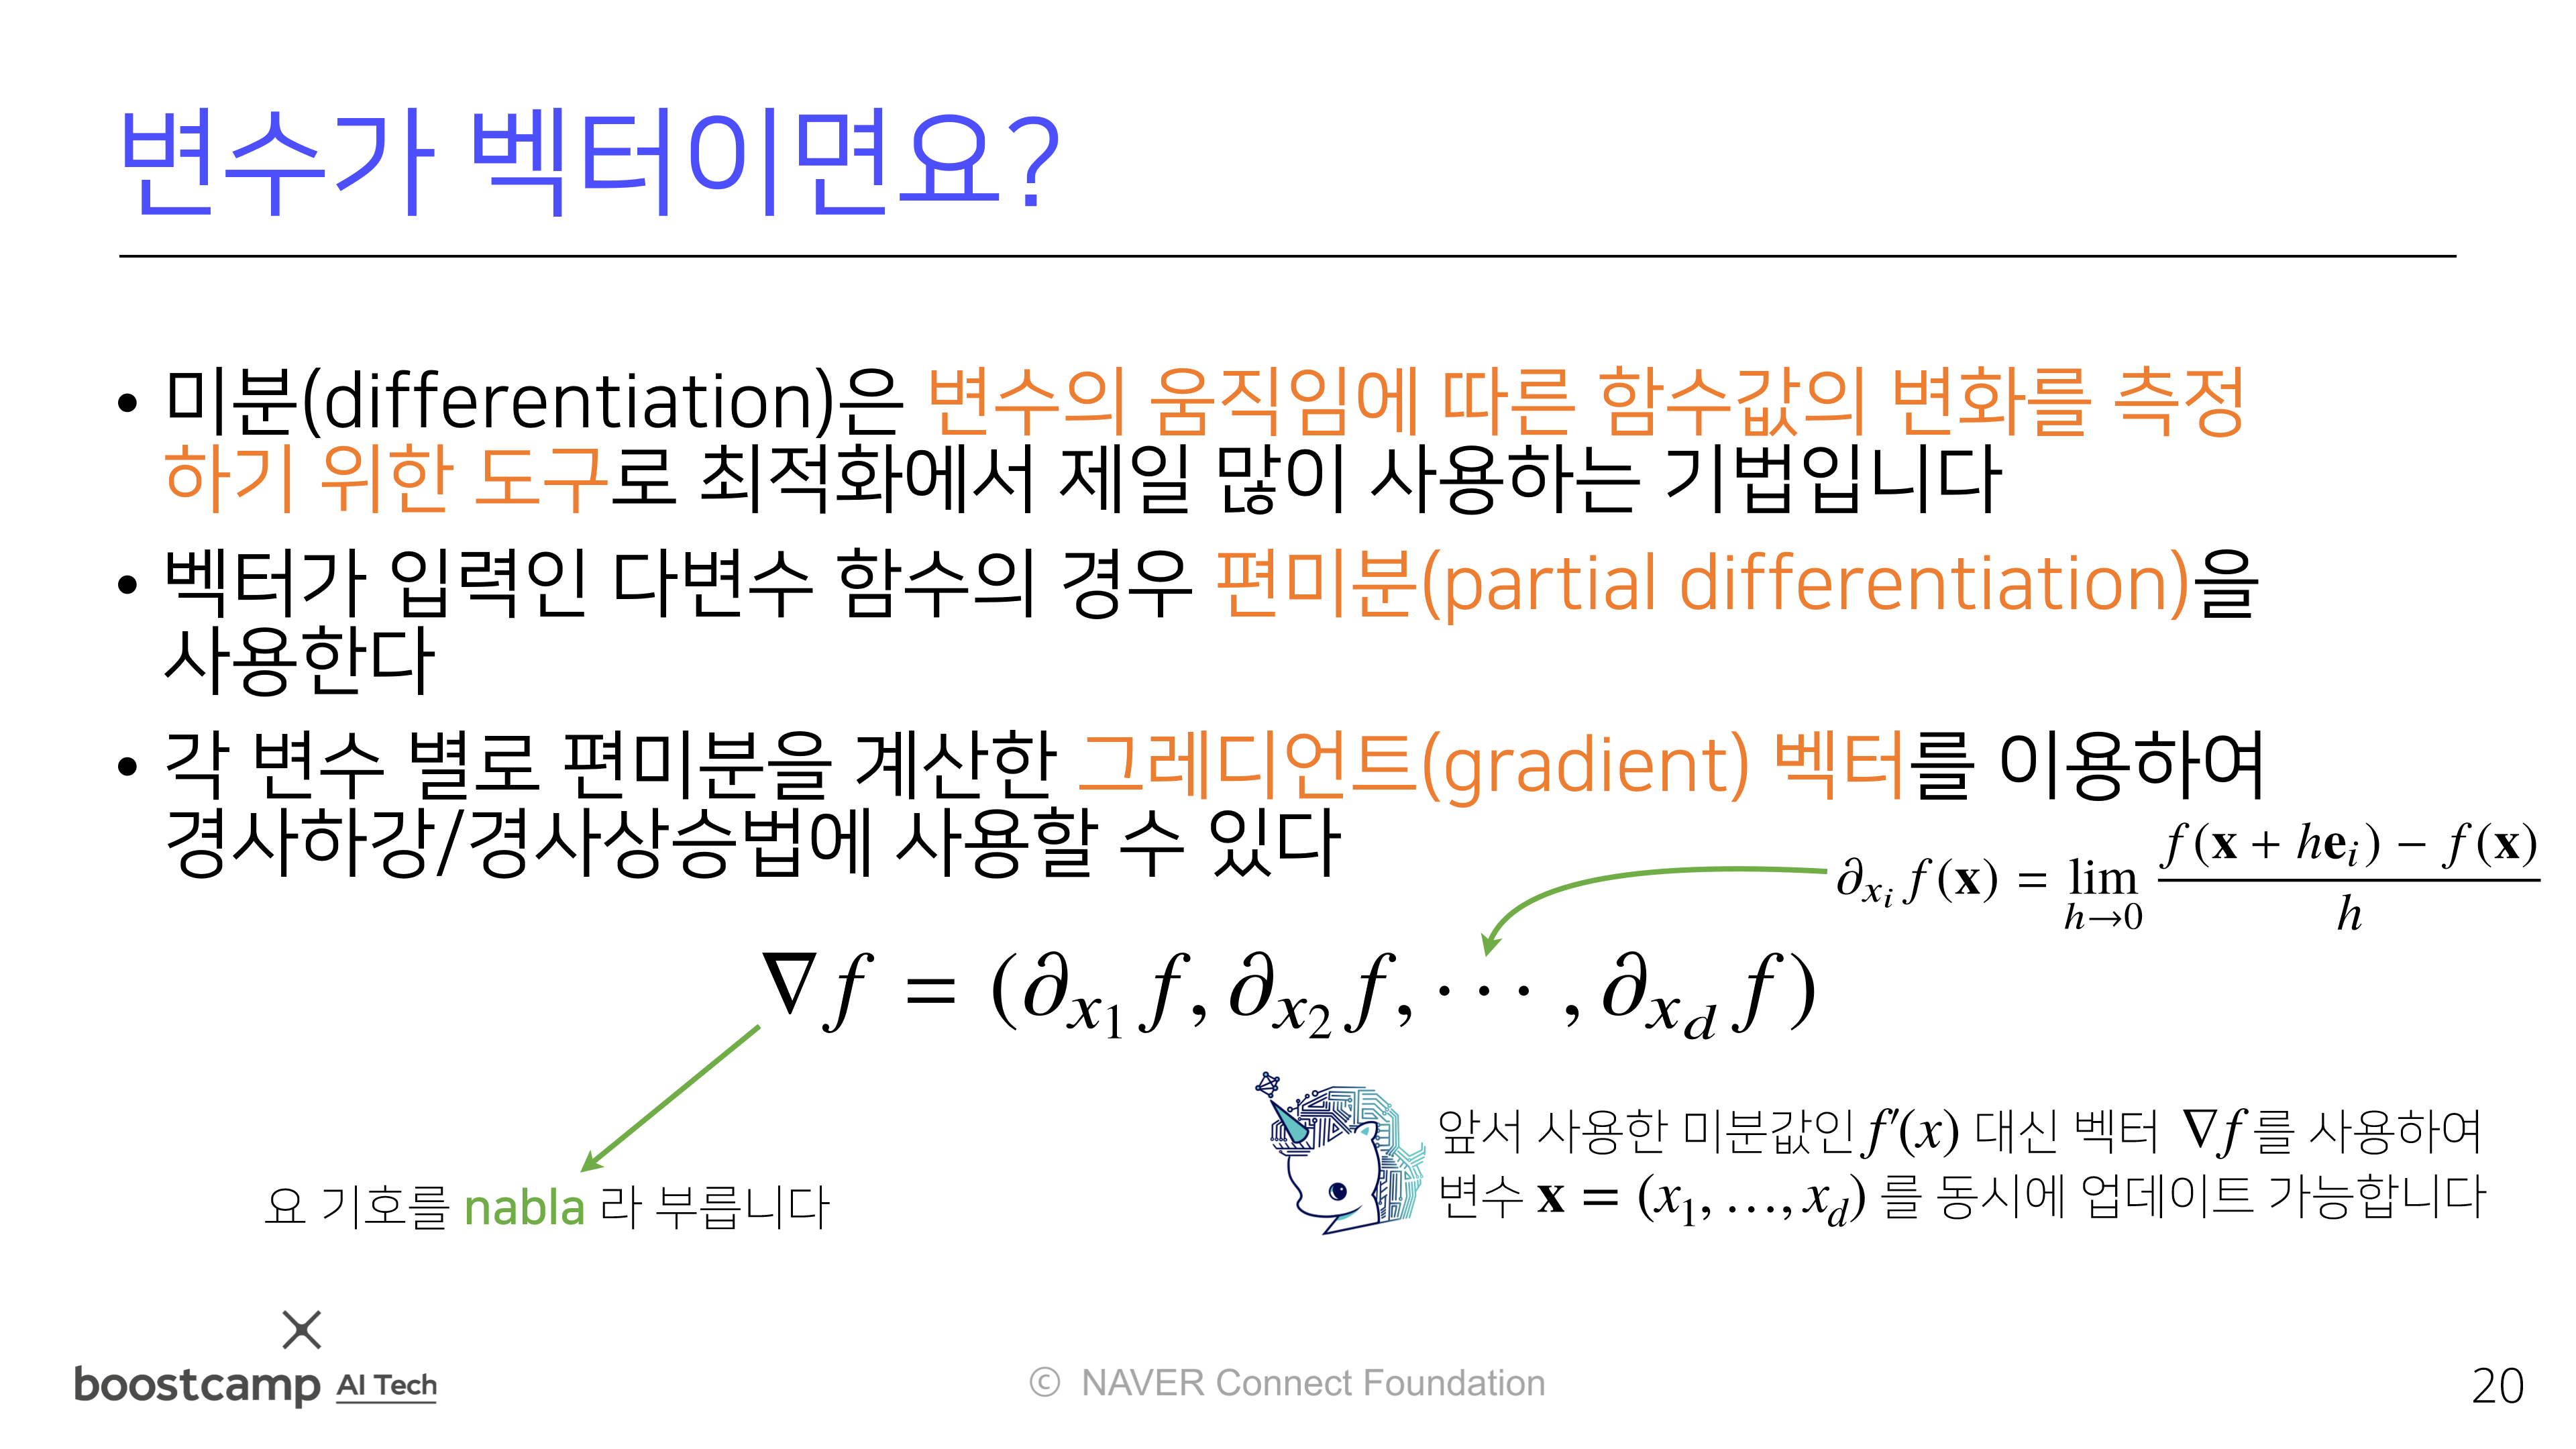

백터이기 때문에 더 이상 gradient의 절대값을 보지 않는다. 

norm을 써서 종료조건을 설정한다. 

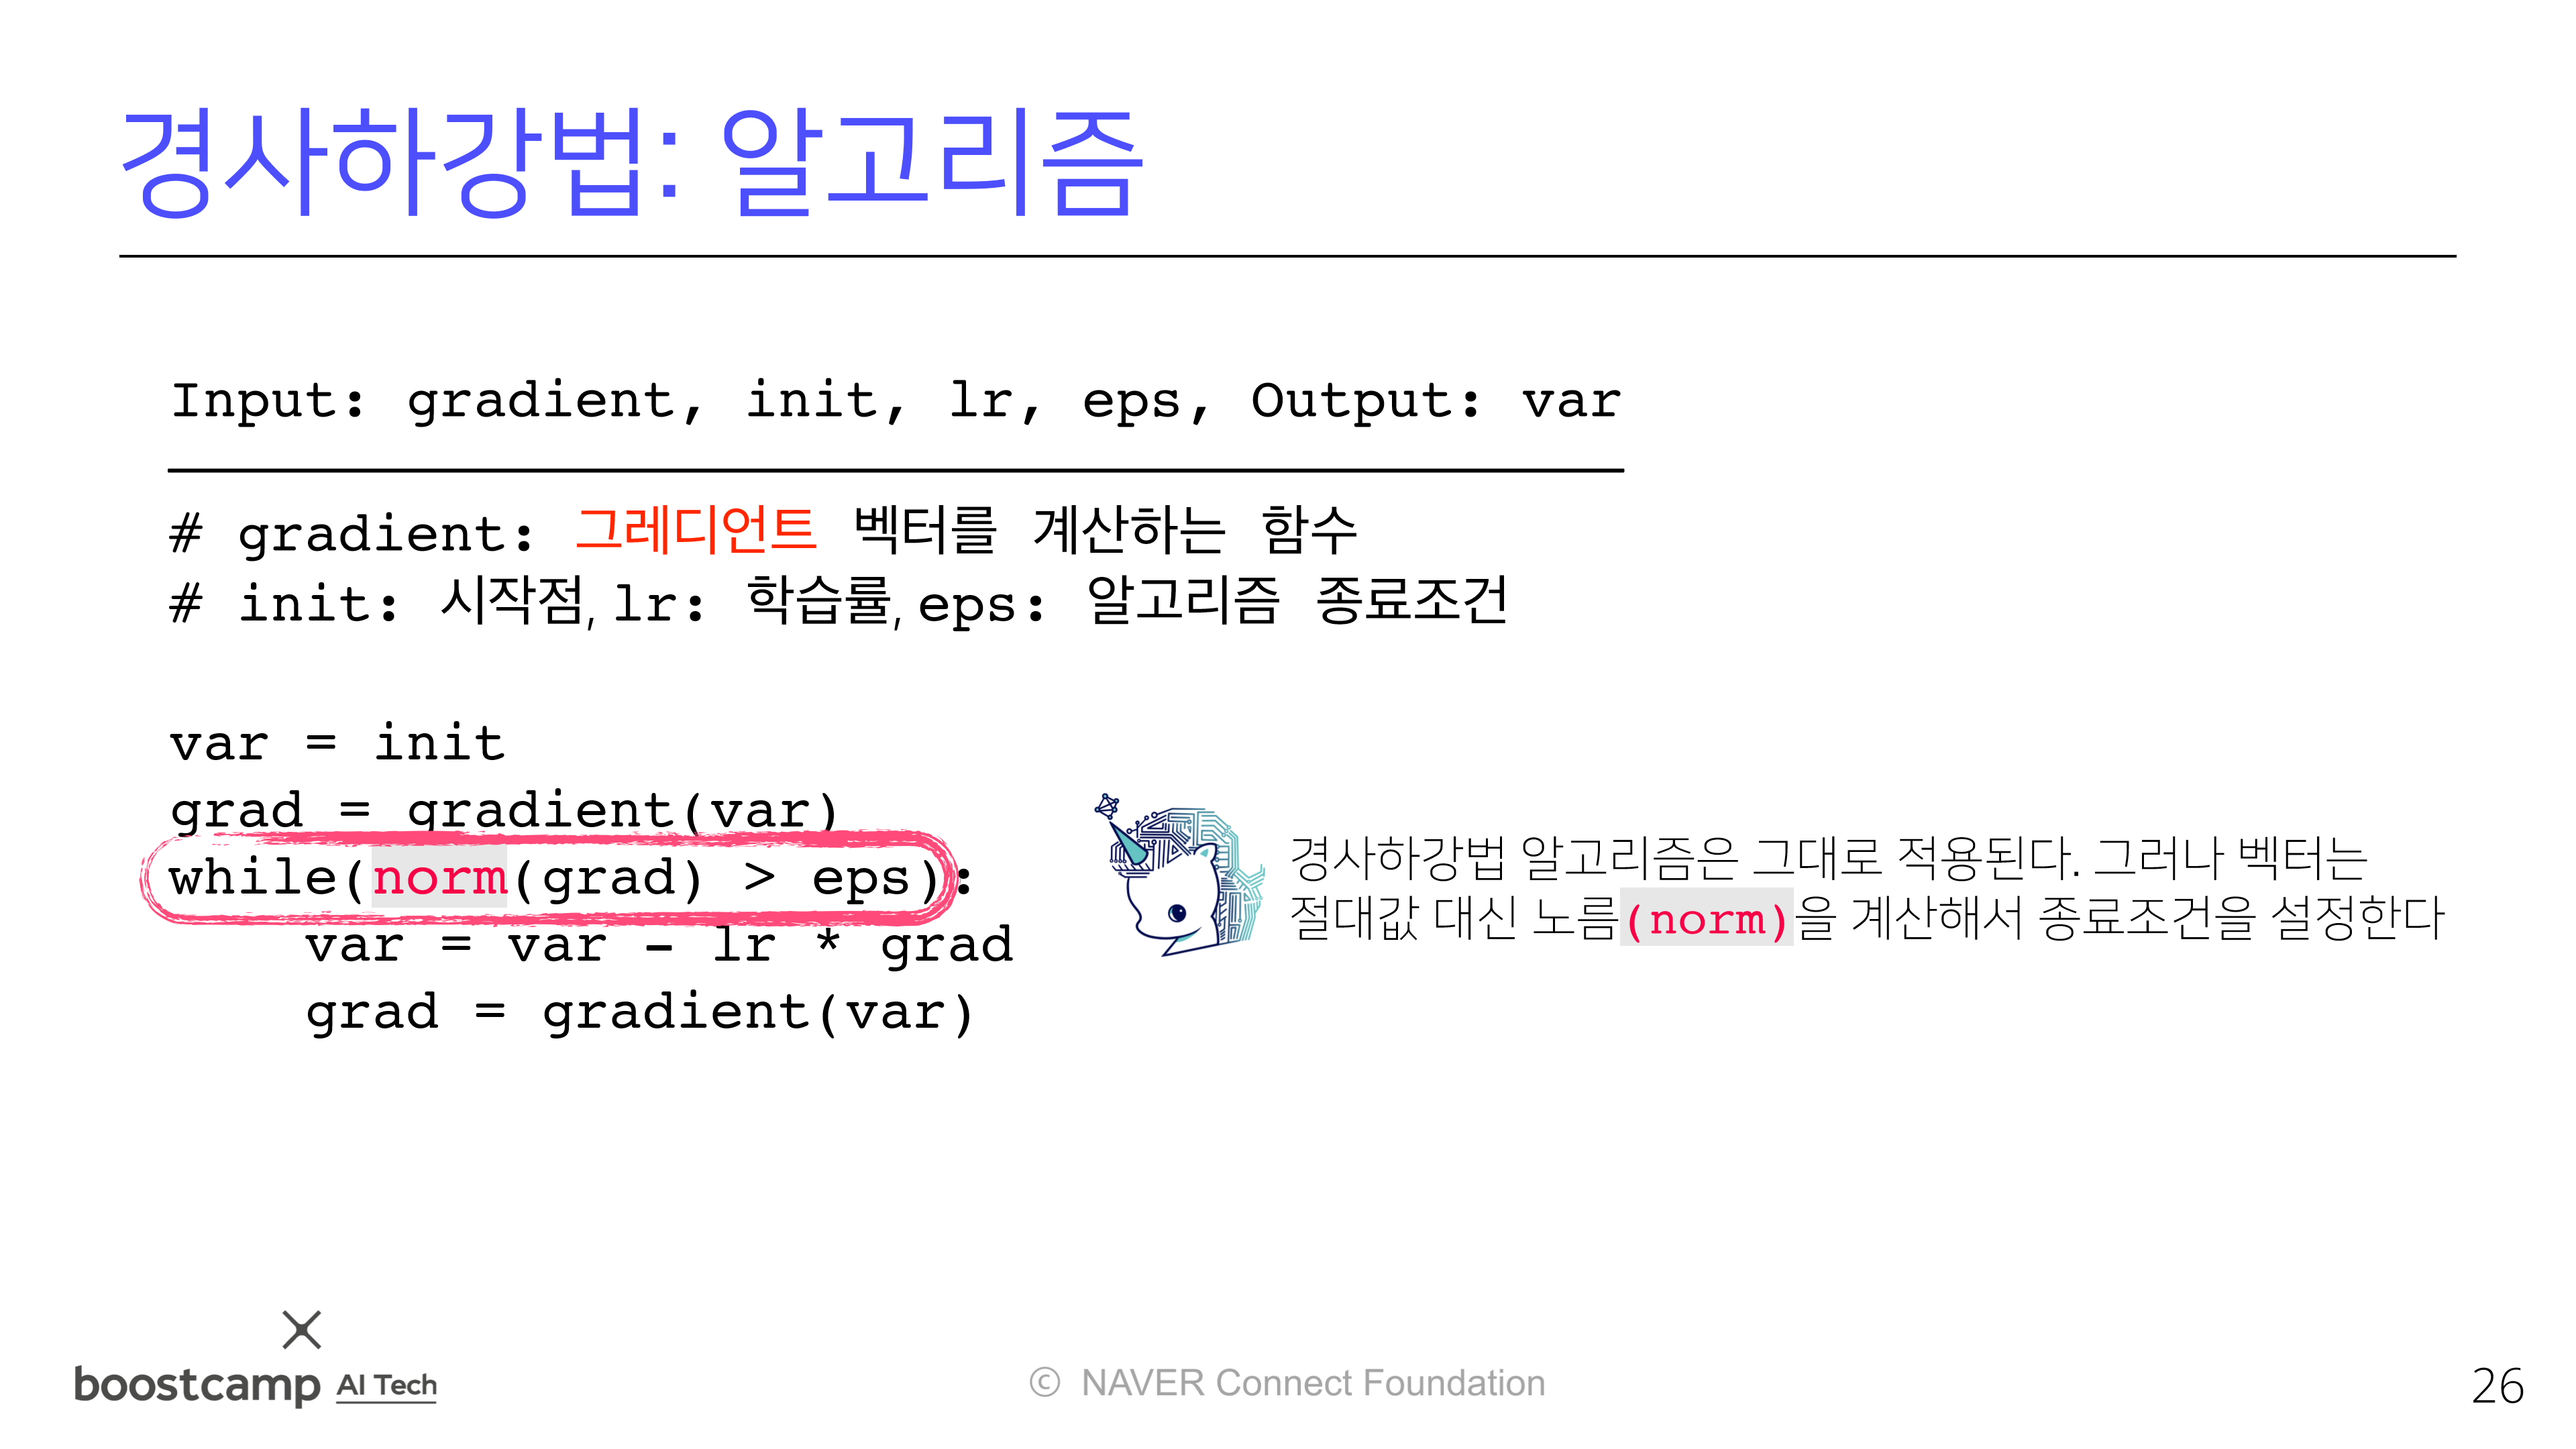

## Advanced

선형회귀를 할 때 pseudo inverse matrix 를 사용하지 않고 경사하강법으로 선형회귀를 해보자. 

왜 그래야 하는가? linear model로 이용하면 gradient descent가 필요없지만 선형 모델이 아닌 일반적인 모델에서도 gradient descent는 사용 가능하므로. 

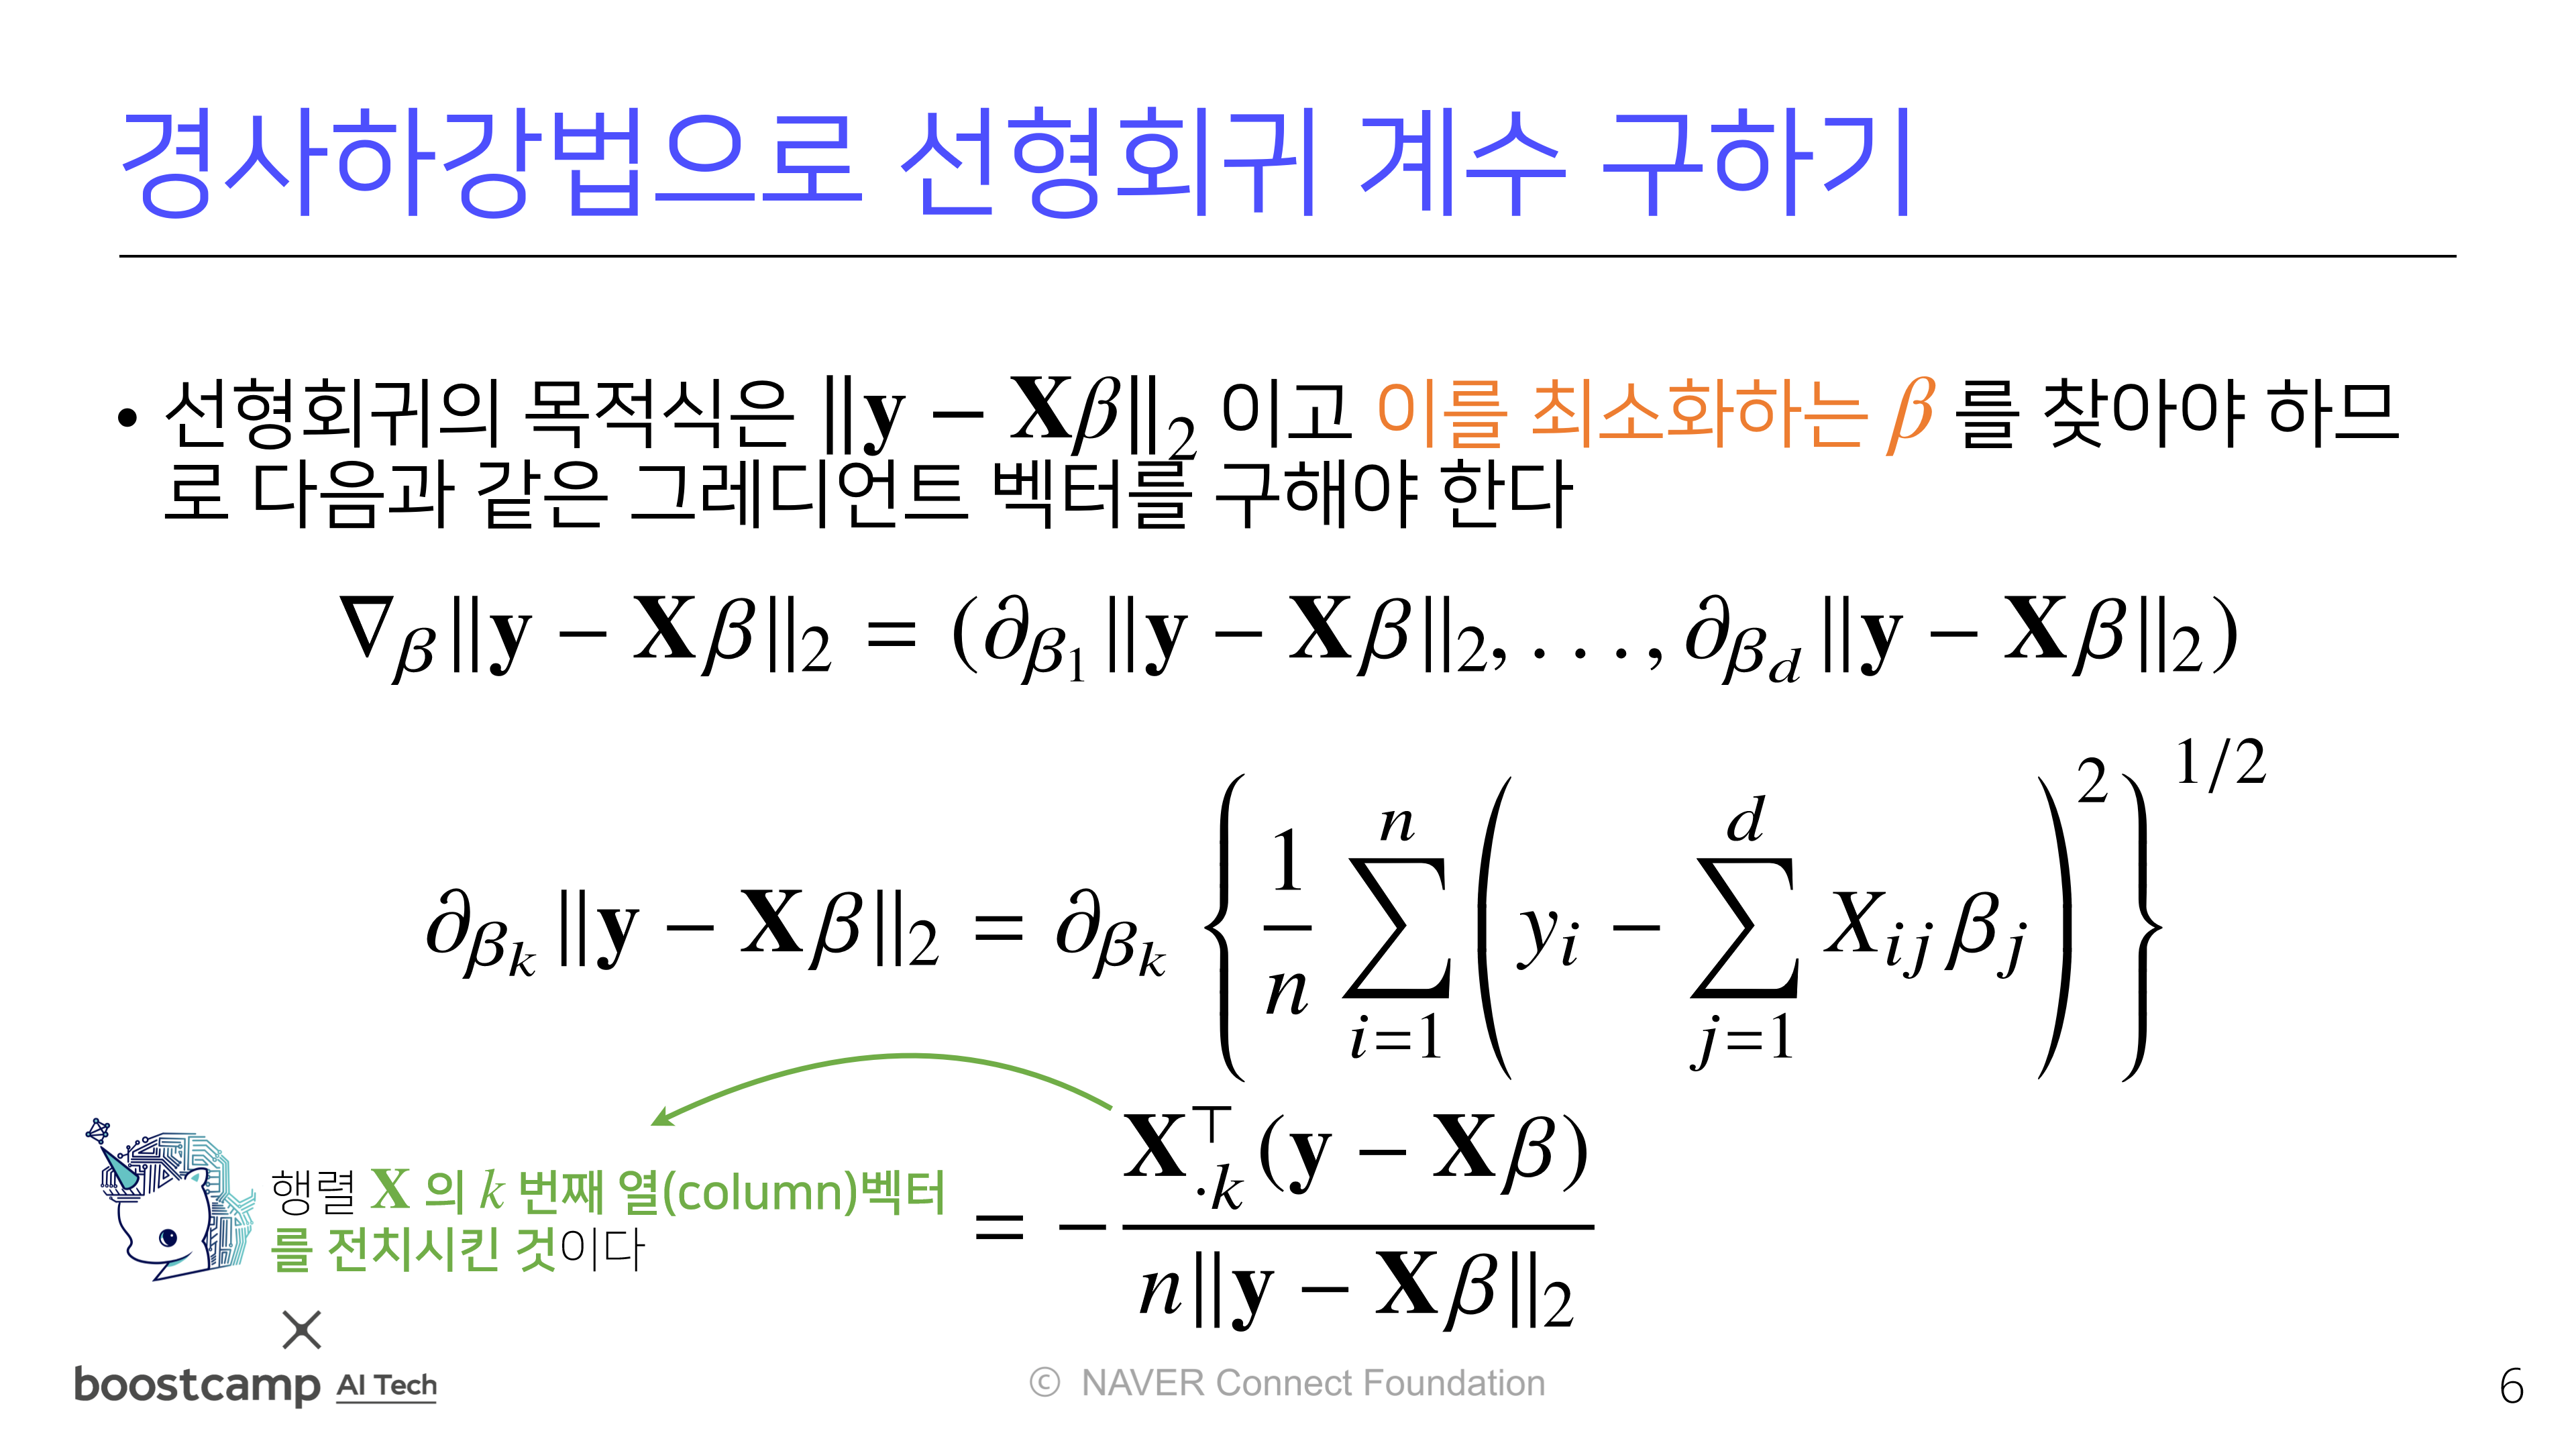

그냥 ||y-Bx||의 제곱의 sum에 루트 씌우는게 아니고 n으로 나눠 mean으로 만들어 준 뒤 루트를 씌운다. 

Bk로 편미분한 결과를 이렇게 구할 수 있다. 

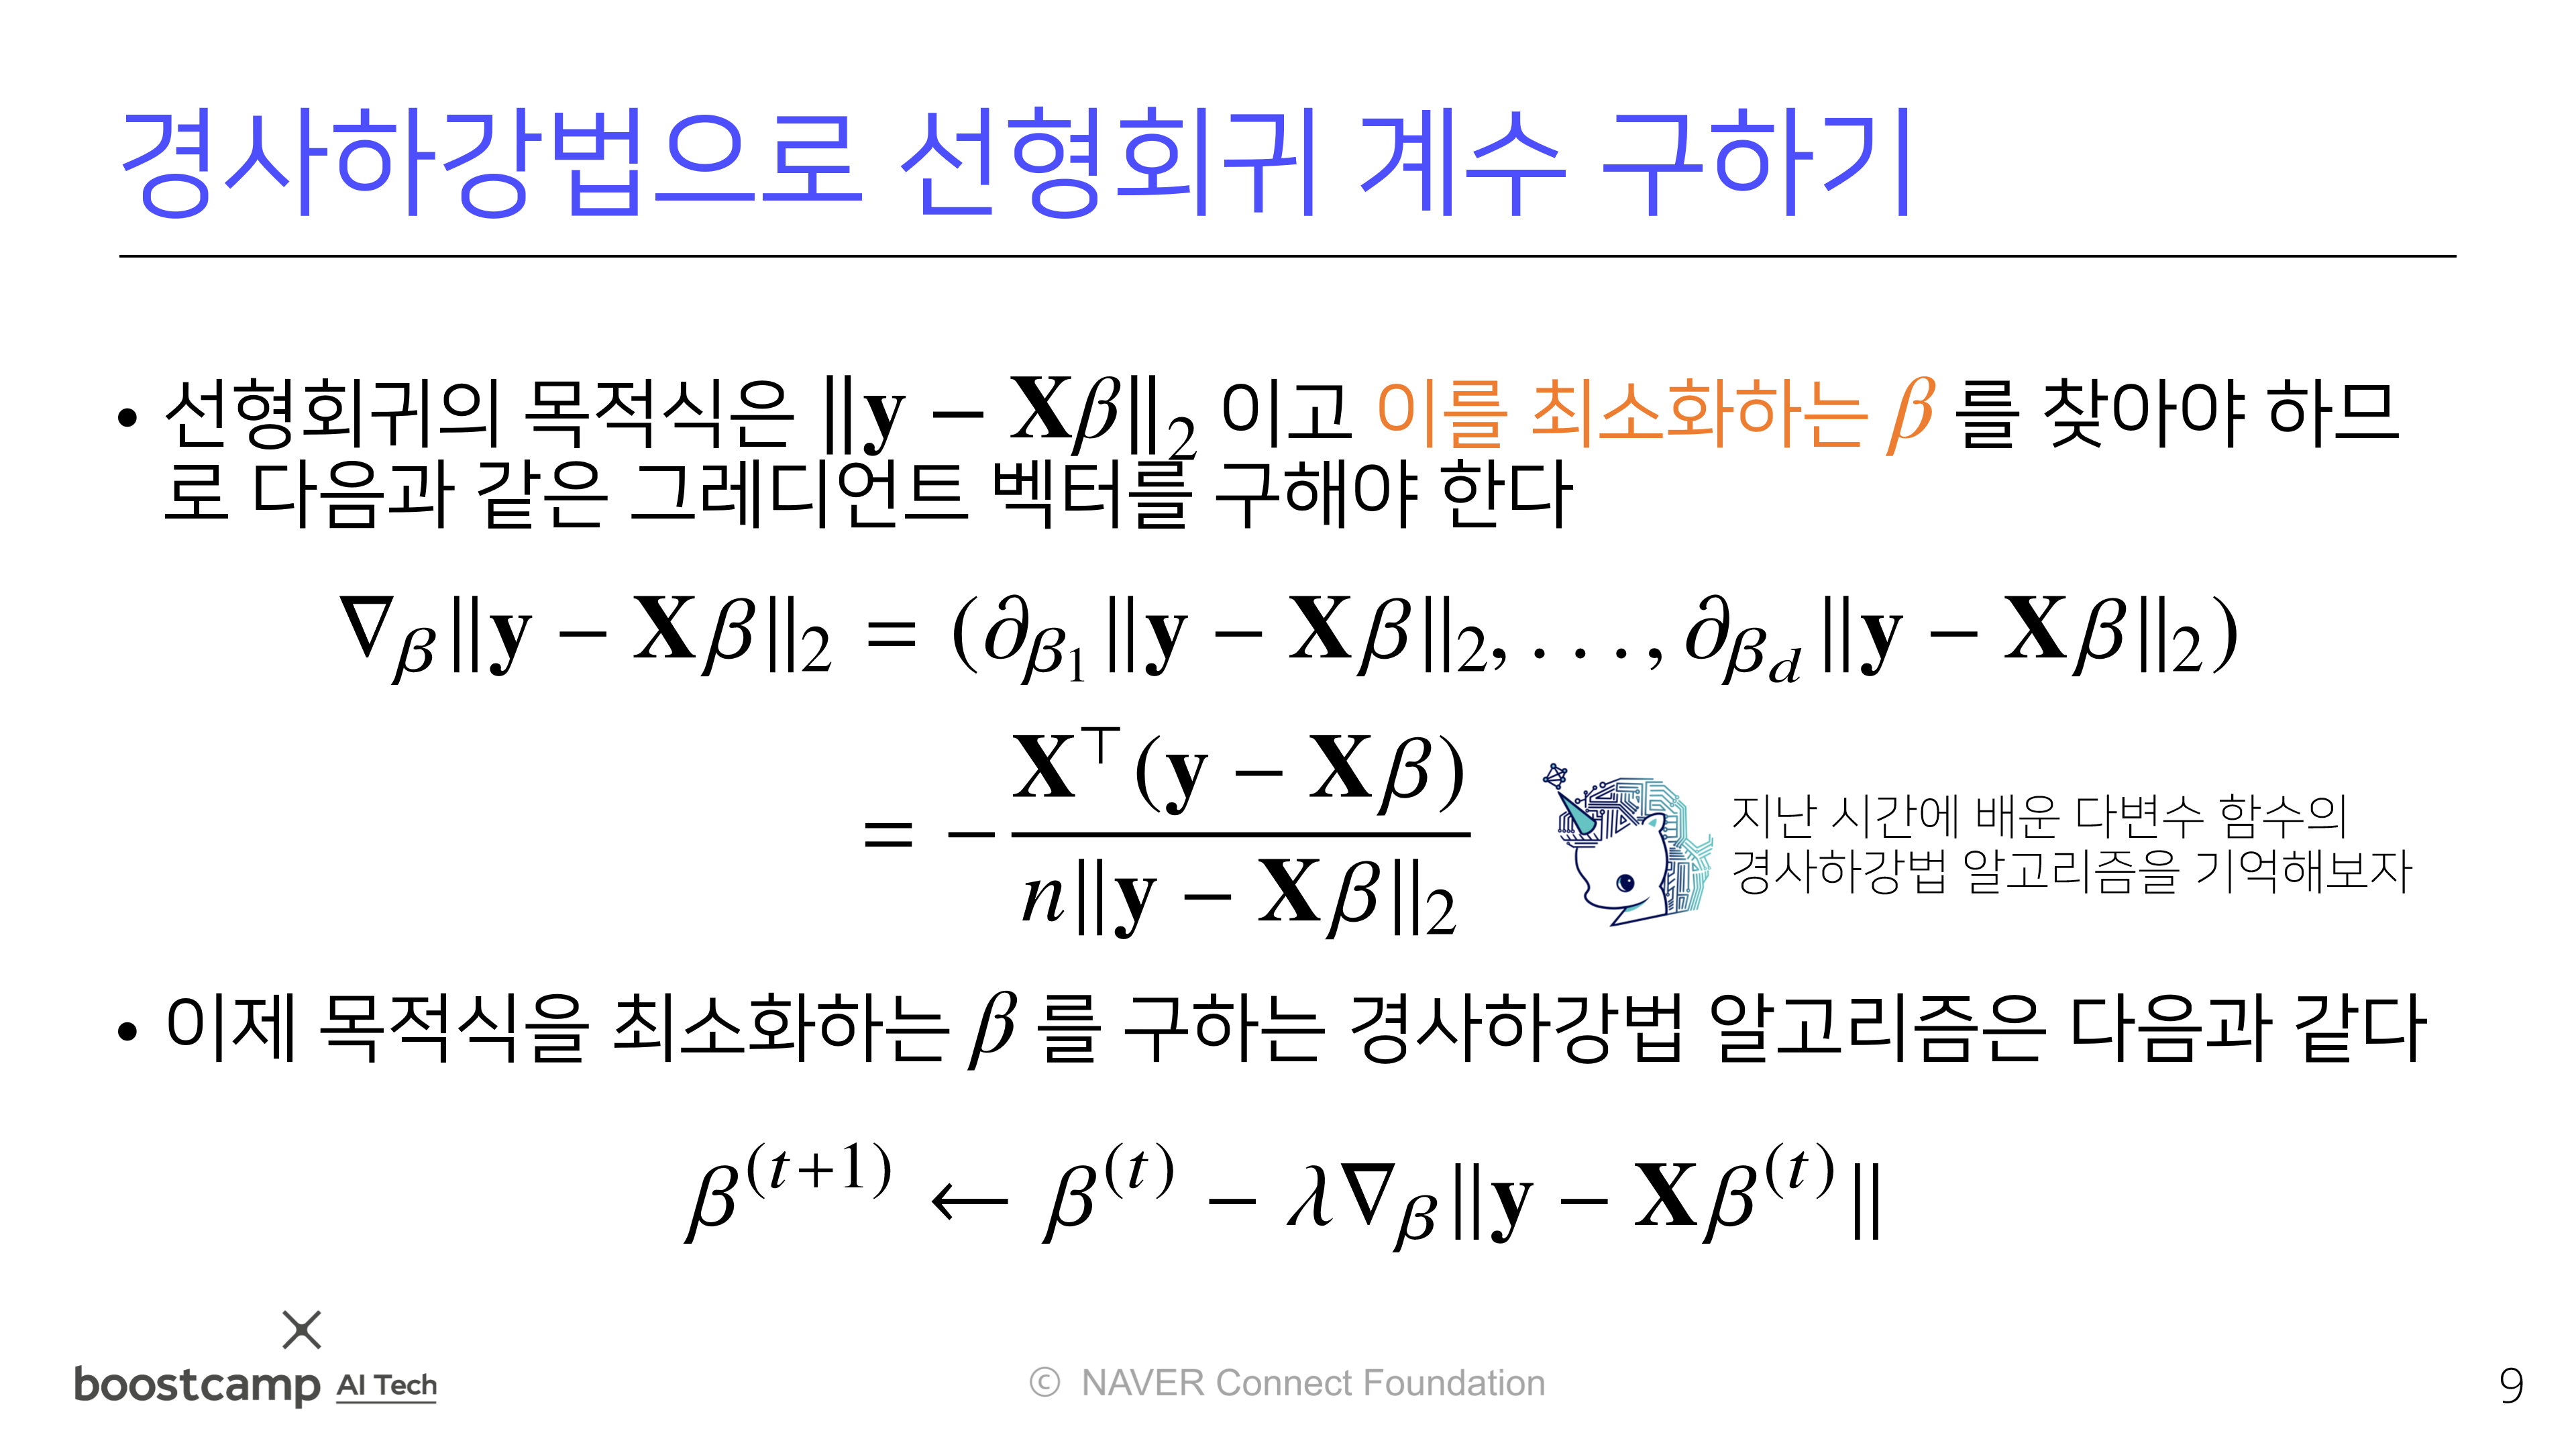

이런 식으로 구할 수 있는데, 

컴퓨터로 구할 땐 요즘은 `grad` < `eps` 될 때까지 한다기 보단 주로 학습 횟수로 학습 정도를 control한다. 

In [4]:
import numpy as np

In [6]:
X = np.array([
    [1, 1], 
    [1, 2],
    [2, 2],
    [2, 3],
])

X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [7]:
y = np.dot(X, np.array([1, 2])) + 3
y

array([ 6,  8,  9, 11])

In [9]:
y = X @ np.array([1, 2]) + 3
y

array([ 6,  8,  9, 11])

In [10]:
B_gd = [10.1, 15.1, -6.5] # True 값은: [1, 2, 3]

X_ = np.array([np.append(x, [1]) for x in X]) # intercept 항 추가한 X
X_

array([[1, 1, 1],
       [1, 2, 1],
       [2, 2, 1],
       [2, 3, 1]])

In [11]:
for t in range(5000):
    error = y - X_ @ B_gd
    
    grad = -np.transpose(X_) @ error
    B_gd = B_gd - 0.01 * grad # learning rate: 0.01

B_gd

array([1.00000367, 1.99999949, 2.99999516])

이론적으로 경사하강법은 미분가능하고 convex한 함수에 대해 적절한 학습률 & 학습횟수를 선택했을 때 수렴이 보장되어 있다. 

선형회귀의 경우 애초에 loss function인 ||y-XB|| 가 convex하기에 당연히 보장된다. 

비선형 회귀의 경우 볼록하지 않고 local minima가 있는, non-convex 한 함수들이 있어서 항상 gradient descent가 수렴을 보장하진 않는다. 

### Stochastic Gradient Descent (SGD) 확률적 경사하강법

모든 데이터를 쓰는게 아니라 데이터 한 개, 또는 일부를 활용해 update 

objective function = loss function이 non-convex 할 때 SGD로 최적화 가능. 

딥러닝에서 SGD가 그냥 gradient descent보다 실증적으로 더 낫다. 

일부의 데이터만 쓰면 mini-batch SGD라고 한다. 

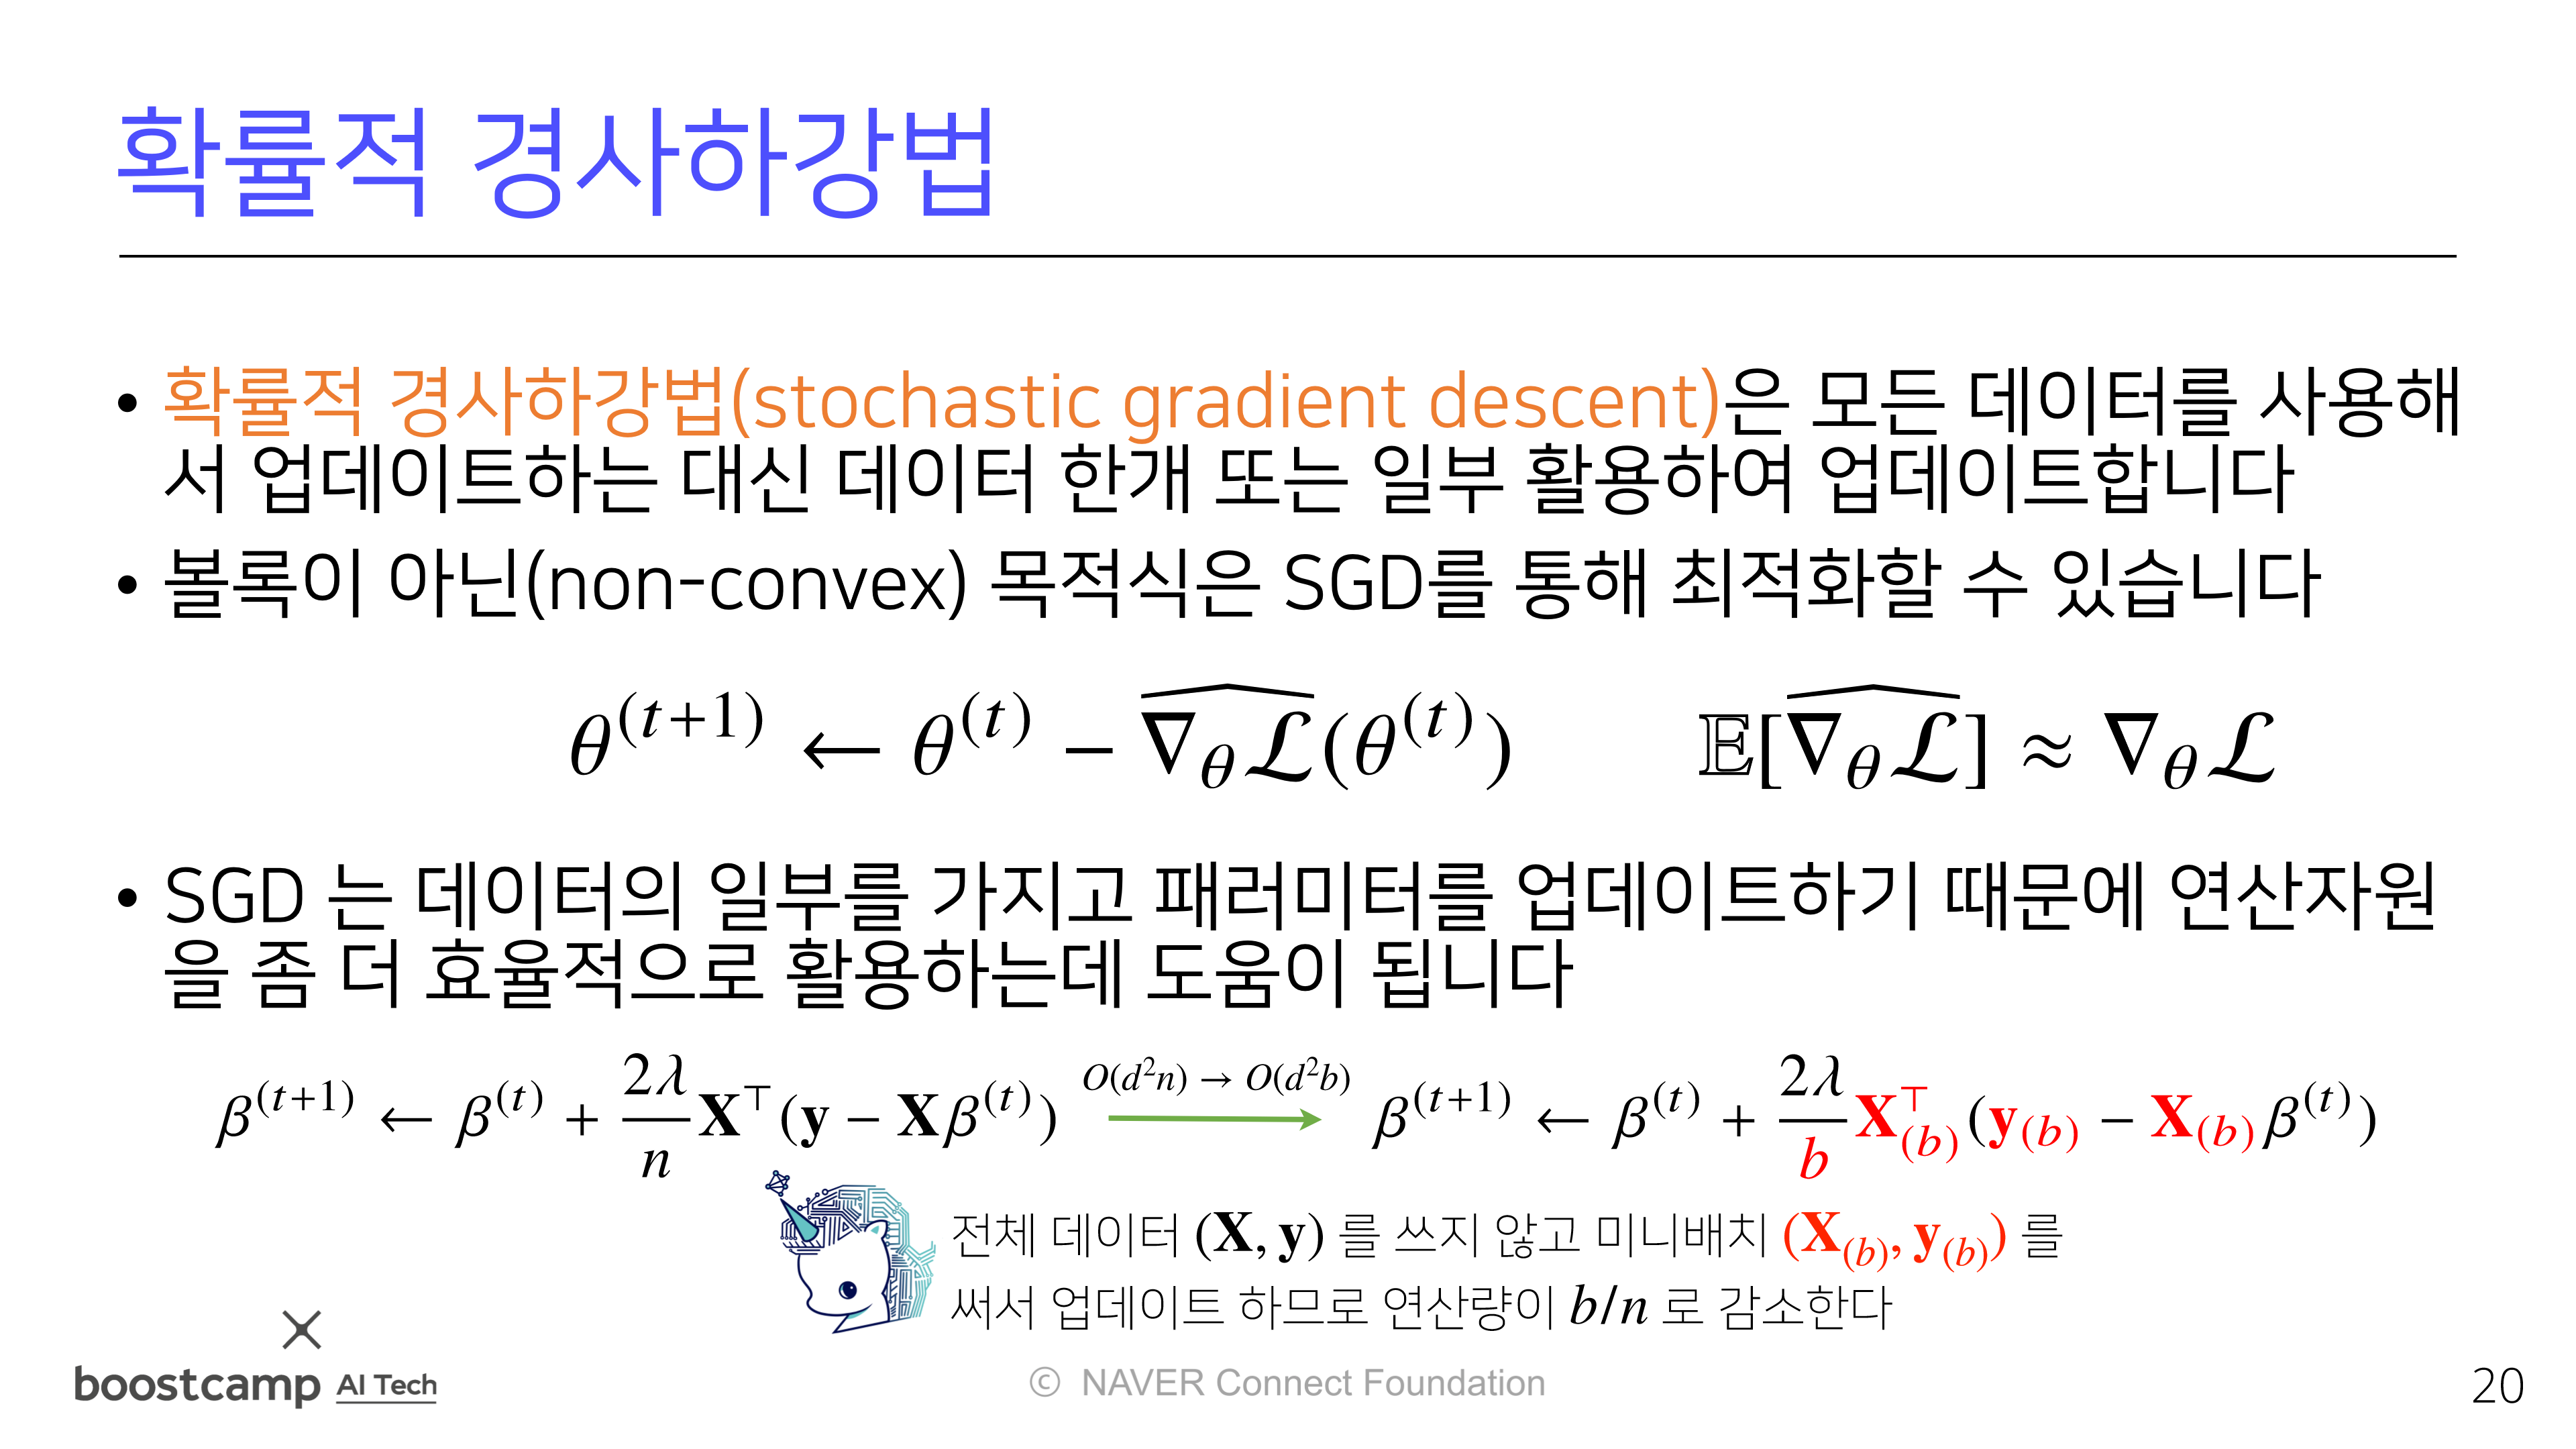

또한 덜 계산하기 때문에 연산의 효율성 또한 생긴다. 

하지만 실제 목적식과는 조금 달라진다. 

또한, 미니배치는 확률적으로 선택하기 때문에 목적식이 계속 모양이 바뀌게 된다. 

이 때문에 non-convex한 loss function에서 local minima에 빠져 gradient가 일시적으로 0이 되더라도 확률적으로 다시 loss function이 바뀌어 local minima 를 빠져나올 수 있게 된다. 

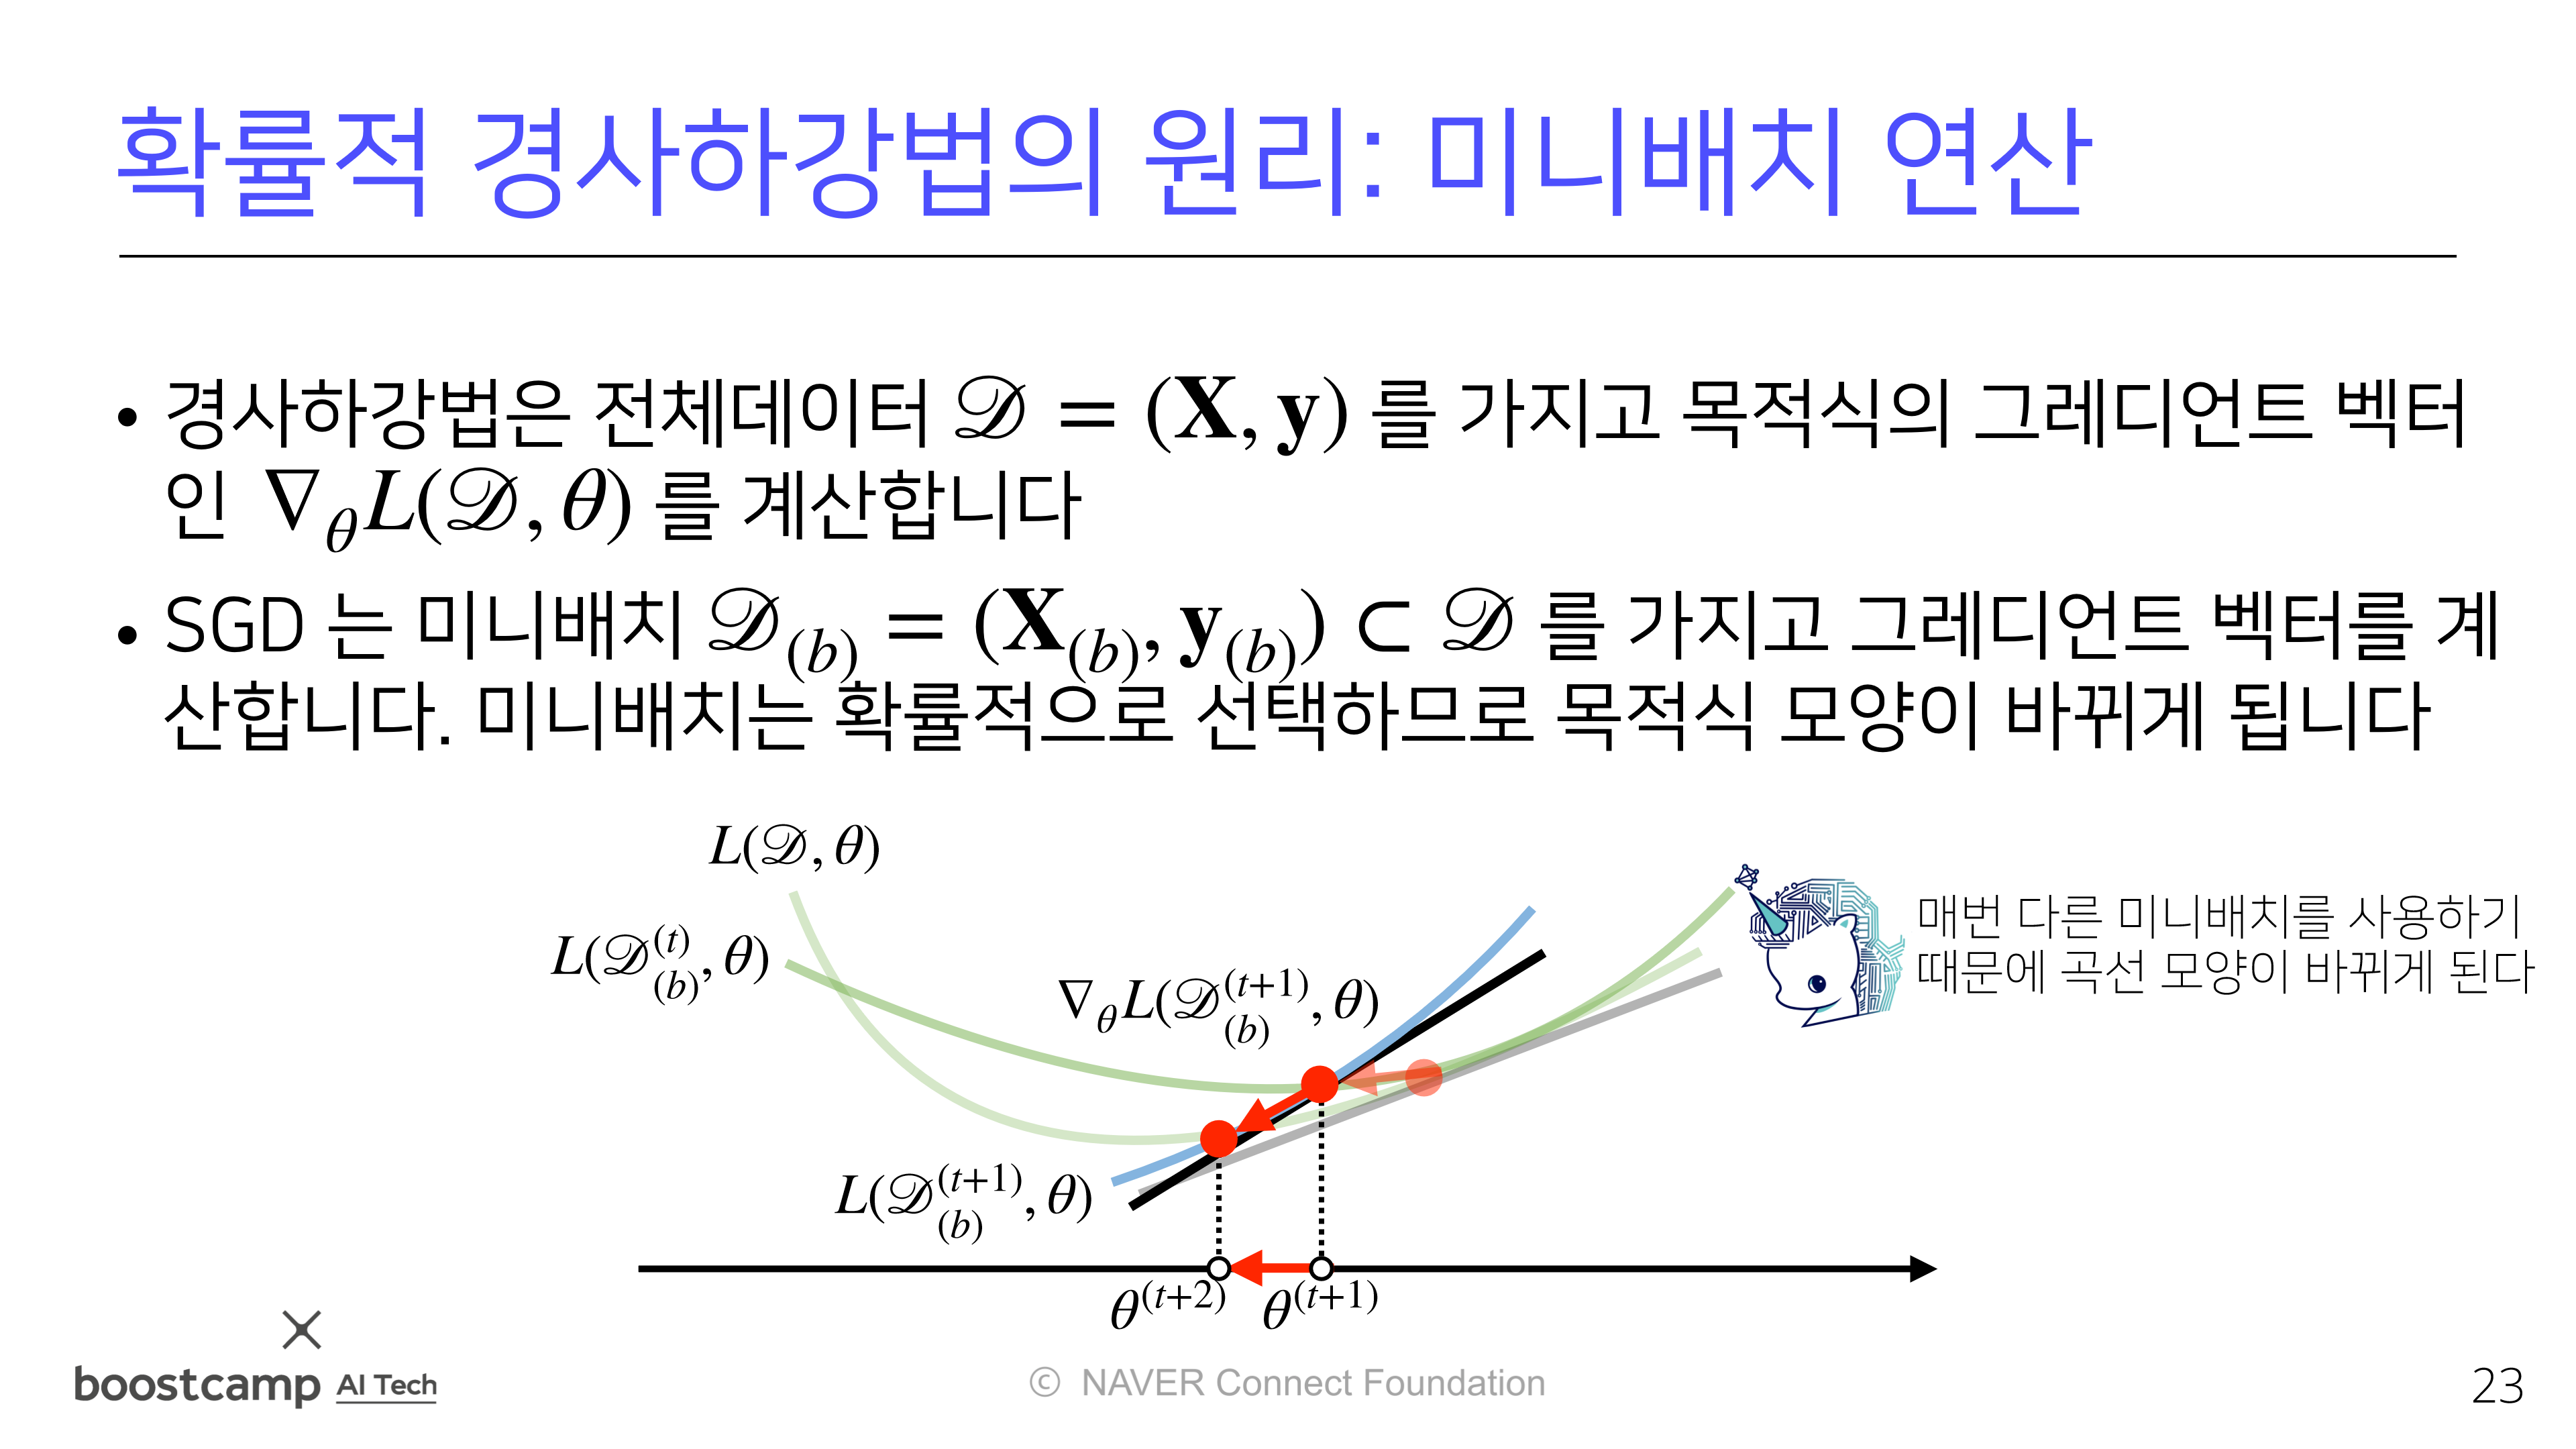

결론적으로 SGD는 strictly convex 하지 않은 목적식에도 사용할 수 있기 때문에 머신러닝 학습에 더 효율적이다. 

경사하강법처럼 똑바른 방향으로 하강하진 않지만 모든 데이터를 가지고 계산하지 않고 mini batch를 가지고 계산하기 때문에 각각의 화살표(update)가 그냥 경사하강법보다 빠르게 진행된다. 

그래프의 속도비교에서 보이듯 너무 batch size가 적으면 그냥 경사하강법보다도 느릴 수 있다. 

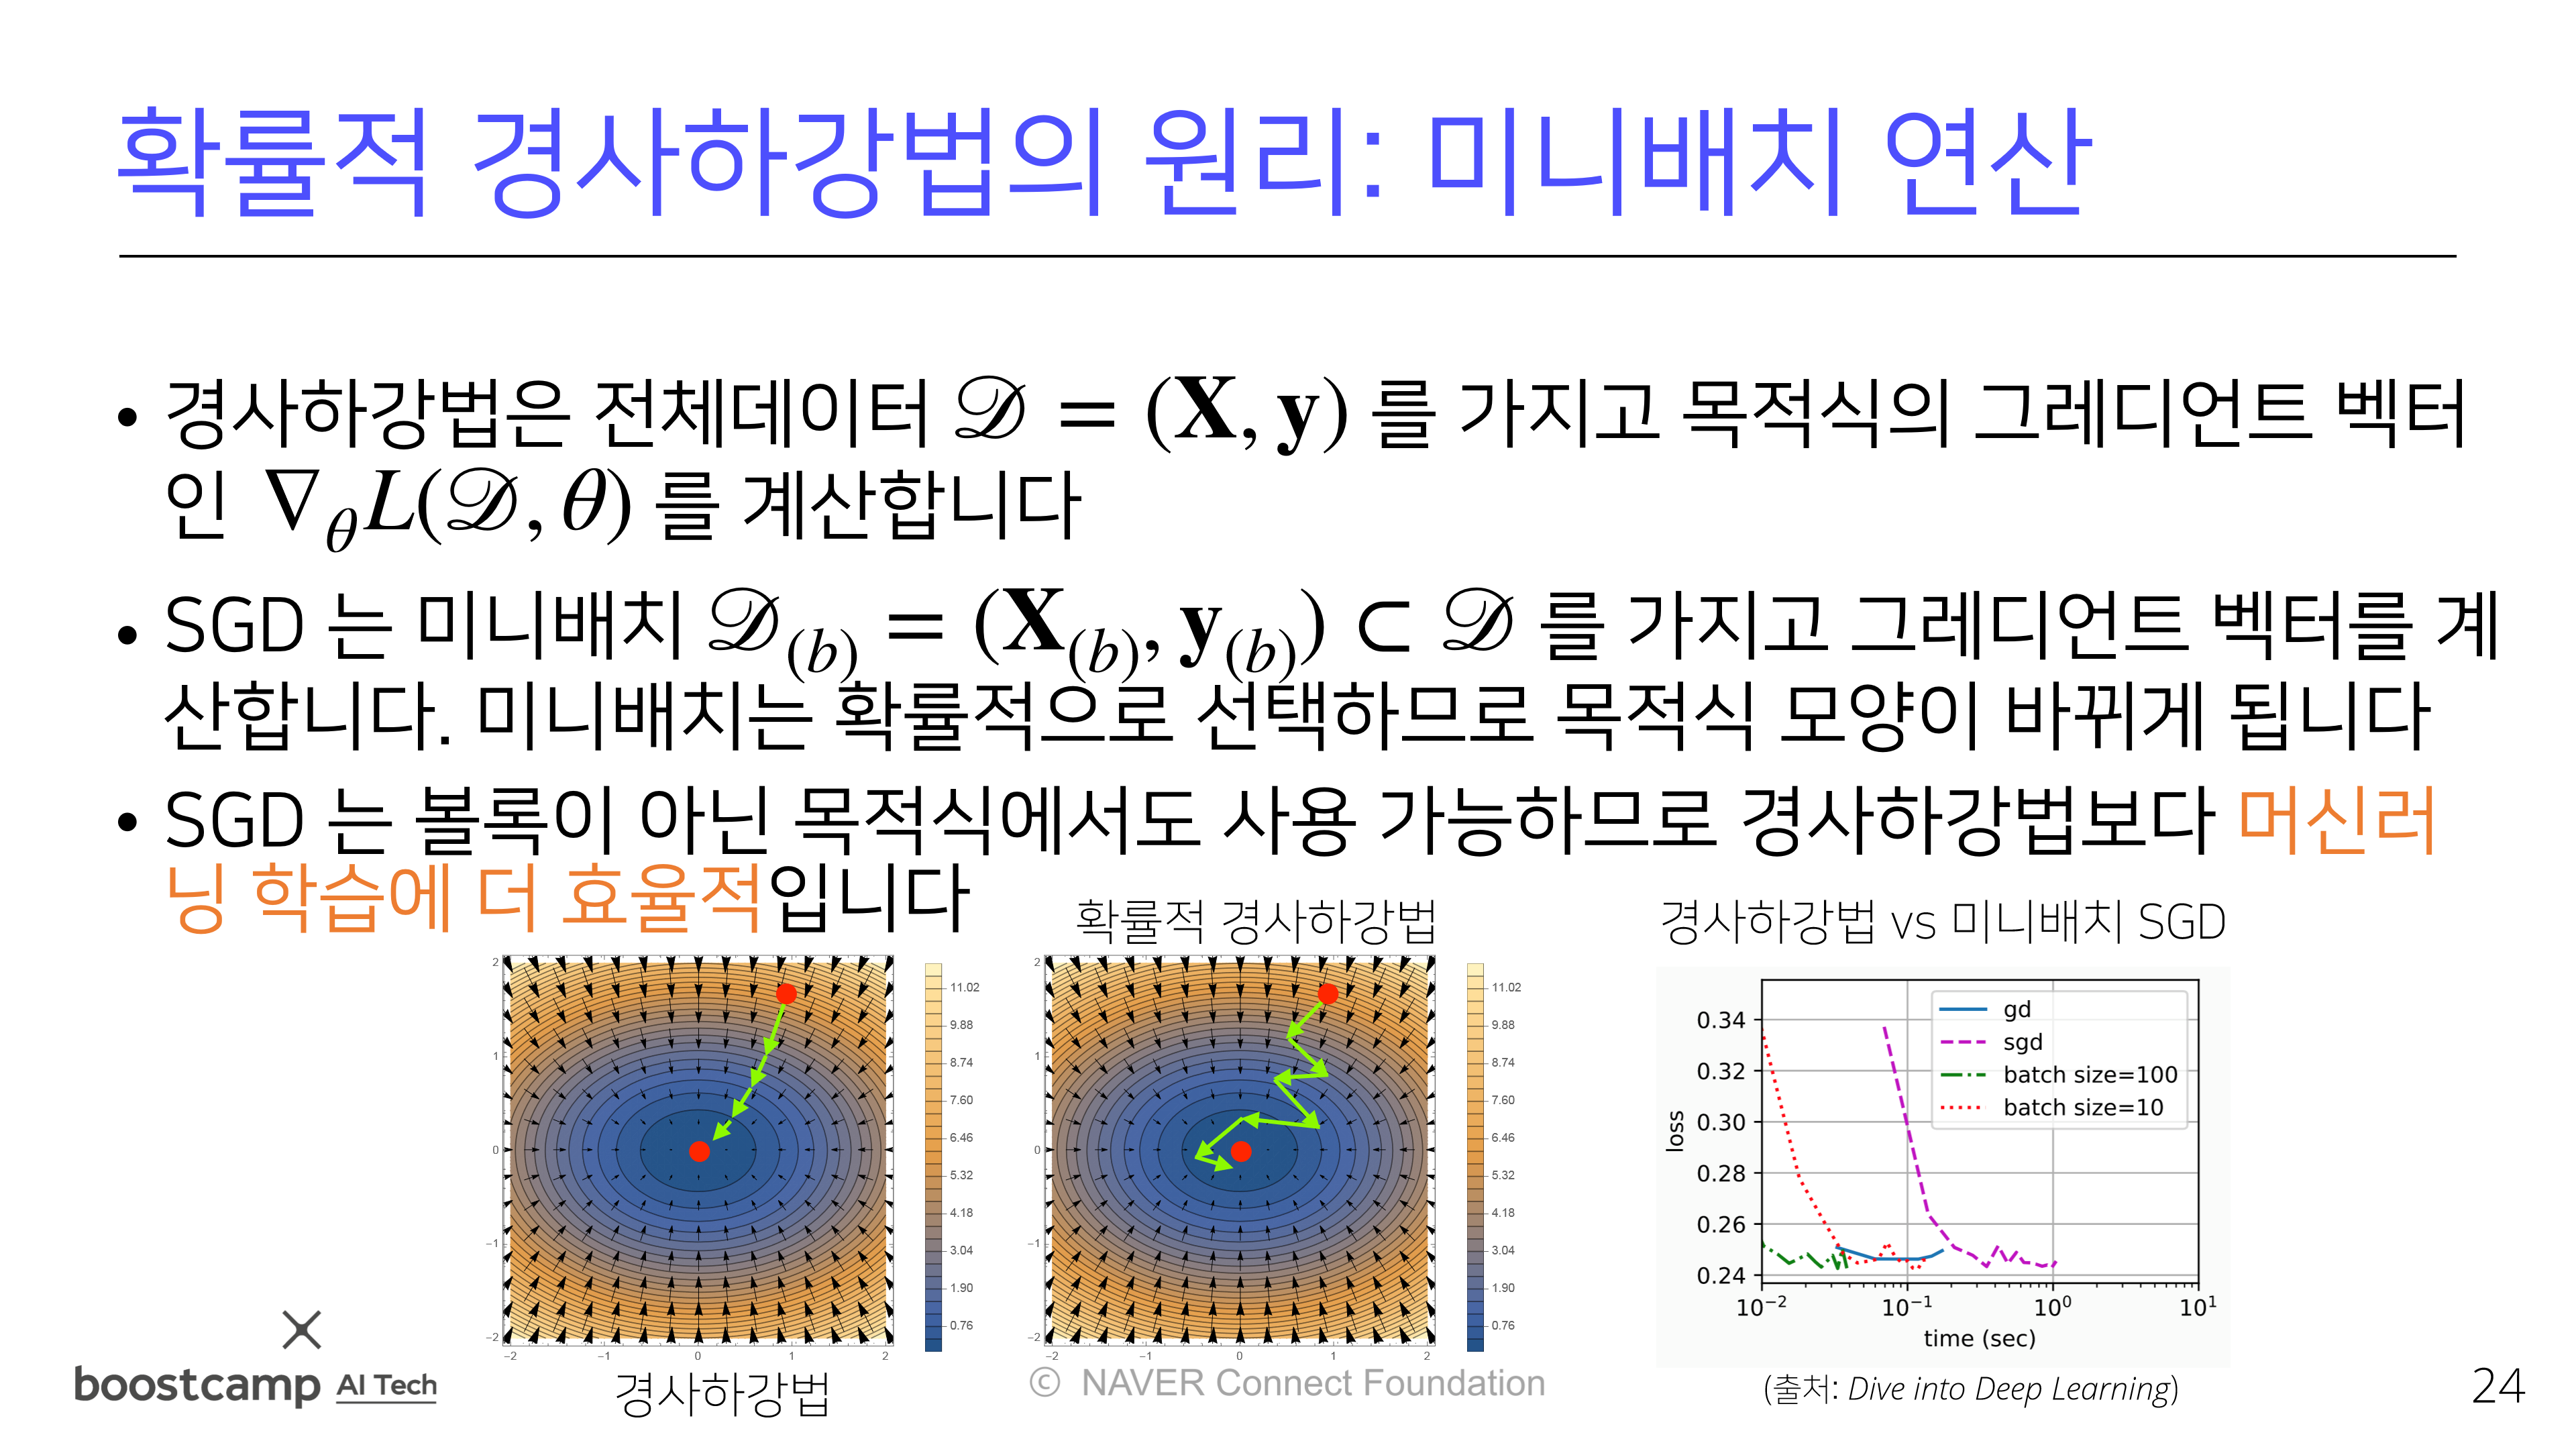

하드웨어 스펙이라는 물리적인 restriction을 생각해도 엄청난 이미지 한꺼번에 학습시키는 경사하강법은 CPU, GPU 성능으로 힘들다. 